In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Generators

## Sine

In [ ]:
def gen_sine(sr,length,freq,amp,phase):
  sr_length = int(sr * length)
  out = np.zeros(sr_length)

  for i in range(sr_length):
    out[i] = amp * np.sin( 2 * np.pi * freq * (i / sr) + phase * 2 * np.pi)
  return out


## Cosine

In [ ]:
def gen_cos(sr,length,freq,amp,phase):
  sr_length = int(sr * length)
  out = np.zeros(sr_length)

  for i in range(sr_length):
    out[i] = amp * np.cos( 2 * np.pi * freq * (i / sr) + phase * 2 * np.pi)
  return out

# Wavetables

## SineWaveTable

In [ ]:
def wave_sine(size):
  out = np.zeros(size)
  for i in range(size):
    out[i] = np.sin(2 * np.pi * (i / size))
  return out

## SquareWave

In [ ]:
def wave_square(size):
  out = np.zeros(size)
  for i in range(size):
    if i < size //2:
      out[i] = 1
    else:
      out[i] = 0
  return out



## Saw

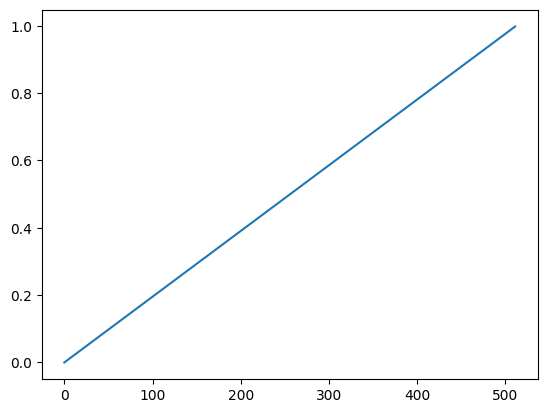

In [ ]:
def wave_saw(size):
  out = np.zeros(size)
  for i in range(size):
    out[i] = i / size
  return out
saw = wave_saw(512)
plt.plot(saw)

## Noise

In [ ]:
def wave_noise(size):
  out = np.zeros(size)
  for i in range(size):
    out[i] = np.random.uniform(-1,1)

  return out

## Linear Interpolation

In [ ]:
def lin_interpol(array,sr,length_in_s,freq,amp):
  size = len(array)
  remainder = 0
  phase = 0.0
  sr_length = sr * length_in_s
  print(sr_length)
  out = np.zeros(sr_length)
  for i in range(sr_length):
    phase += float(size) / (sr / freq)
    if phase >= size - 1:
      phase -= size
    remainder = phase - np.floor(phase)
    out[i] = ((1 - remainder) * array[ int(phase)] + remainder * array[1 + int(phase)]) * amp
  return out

## Cubic Hermite Interpolation

In [ ]:
def cubic_hermite_interpol(array,sr,length_in_ms,freq,amp):
  #higher "resolution" (gets interesting with other arrays or math functions and played back with low frequencys)
  len_arr = len(array)
  remainder = 0.0
  a = 0.0
  b = 0.0
  c = 0.0
  d = 0.0
  a1 = 0.0
  a2 = 0.0
  a3 = 0.0
  sampleRate = sr
  sr_length = length_in_ms * sr
  phase = 0.0
  out = np.zeros(sr_length, dtype = float)

  for i in range(sr_length):
    #same as in linear interpolation
    phase += float(len_arr)/(sampleRate/(freq))
    if phase >= len_arr - 1:
      phase -= len_arr
    remainder = phase - np.floor(phase);
    # 4 points
    if phase==0:
      a=array[int(len_arr - 1)]
      b=array[int (phase)]
      c=array[int (phase)+1]
      d=array[int (phase)+2]
    else:
      a=array[int (phase)-1]
      b=array[int (phase)]
      c=array[(int (phase)+1)%len_arr]
      d=array[(int (phase)+2)%len_arr]
    #computation of cubic hermite interpolation
    a1 = 0.5 * (c - a)
    a2 = a - 2.5 * b + 2. * c - 0.5 * d
    a3 = 0.5 * (d - a) + 1.5 * (b - c)
    out[i] = float(((a3 * remainder + a2) * remainder + a1) * remainder + b) * amp
  return out

# Frequency Mod

## Linear Interpolation Freq Mod

## Cubic Hermite Interpolation Freq Mod

# Envelopes

In [50]:
def exp_env(decay_factor,start,end,length):
  arr = np.linspace(0, 1, length)
  decay_factor = decay_factor  # Adjust this to control the rate of decrease

  # Create the custom exponential-like envelope
  envelope = end - np.exp(-decay_factor * (arr ** 3)) * (end - start)
  return envelope
def exp_env_freq(decay_factor,start,end,length):
  used_length =  length // 8
  arr = np.linspace(0, 1, used_length)
  decay_factor = decay_factor  # Adjust this to control the rate of decrease

  # Create the custom exponential-like envelope
  envelope = end - np.exp(-decay_factor * (arr ** 3)) * (end - start)
  envelope2 = np.zeros(length)
  envelope2[:] = envelope[-1]
  envelope2[0:used_length] = envelope[:]
  return envelope2

# Utils calc

In [ ]:
# schon implementiert:
def midi_to_freq(p):
    return 440 * 2 ** ((p - 69) / 12)
def freq_to_midi(f):
    midi = 12 * np.log(f/440,2) + 69
    return midi

# Plotting Functions